In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
code = np.arange(32768)
coarse = (0x7C00 & code) >> 10
mid = (0x3E0 & code) >> 5
fine = (0x1F & code)

In [3]:
with open('freq_sweep_lc_count_result.json') as f:
    data = json.load(f)

In [4]:
board = 'q8'
tx, rx = np.array(data[board]['tx']), np.array(data[board]['rx'])
diff = tx - rx

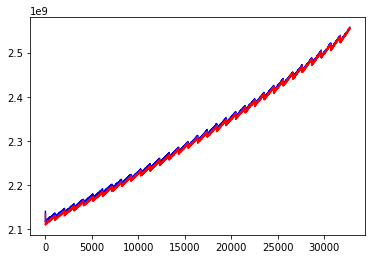

In [5]:
plt.plot(code, tx, 'b')
plt.plot(code, rx, 'r')
plt.show()

In [6]:
X = np.array([
    coarse, mid, fine
]).T
coeffs = np.linalg.lstsq(X, diff)[0]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


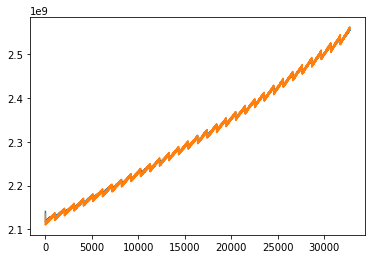

In [7]:
plt.plot(code, tx)
plt.plot(rx + X @ coeffs)
plt.show()

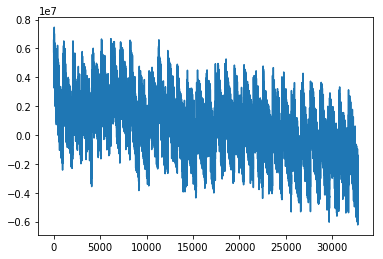

In [8]:
plt.plot(code, tx - (rx + X @ coeffs))
plt.show()